# Classez des images à l'aide d'algorithmes de Deep Learning - Prétraitement

### Sommaire


* [1. Importation des librairies, définition des fonctions et chargement des images](#1)
    * [1.1 Importation des librairies](#1_1)
    * [1.2 Définition des fonctions](#1_2)
    * [1.3 Chargement des images sous forme de Dataframe](#1_3)
* [2. Exploration des données](#2)
    * [2.1 Nombre d'images par classes](#2_1)
    * [2.2 Affichage de quelques images](#2_2)
* [3. Prétraitement des données](#3)
    * [3.1 Test unitaire](#3_1)
        * [3.1.1 Redimensionnement de l'image](#3_1_1)
        * [3.1.2 Conversion en niveau de gris](#3_1_2)
        * [3.1.3 Etirement de l'histogramme avec autocontrast](#3_1_3)
        * [3.1.4 Egalisation de l'histogrammme](#3_1_4)
        * [3.1.5 Filtrage de l'image](#3_1_5)
    * [3.2 Test de la fonction de prétraitement des données](#3_2)
    * [3.3 Prétraitement des données](#3_3)
* [4. Séparation en train, validation et test set](#4)

## 1. Importation des librairies, définition des fonctions et chargement des images <a class="anchor" id="1"></a>

### 1.1 Importation des librairies <a class="anchor" id="1_1"></a>

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import cv2
from PIL import Image, ImageOps, ImageFilter

# Pour mettre en place une barre de chargement
from tqdm import tqdm

# Graphiques
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Tensorflow keras
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array, array_to_img

# Sklearn
from sklearn.model_selection import train_test_split

### 1.2 Définition des fonctions <a class="anchor" id="1_2"></a>

In [2]:
def preprocess_images(image_path, target_size=(224, 224)):
    """Fonction de preprocessing des images"""
    # Charger l'image en couleur
    img = Image.open(image_path)
    
#     # Redimensionner l'image à la taille spécifiée (224x224)
#     img_resized = img.resize((224, 224))
    
    # Conversion en niveaux de gris
    img_gray = img.convert('L')
    
    # Etirement de l'histogramme
    img_autocontrast = ImageOps.autocontrast(img_gray)
    
    # Égalisation de l'histogramme
    img_equalized = ImageOps.equalize(img_autocontrast)
    
    # Filtre de l'image
    img_filtered = img_equalized.filter(ImageFilter.GaussianBlur(radius=2))
    
    return img_filtered

def keypoints_SIFT(image_path, sift):
    """Fonction de preprocessing des images"""
    # Charger l'image
    img = cv2.imread(image_path)
    
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Détecter les keypoints
    kp = sift.detect(gray, None)
    
    # Dessiner les keypoints sur l'image
    img = cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    return img

### 1.3 Chargement des images sous forme de Dataframe <a class="anchor" id="1_3"></a>

In [3]:
# Chemin vers le répertoire d'images
images_dir = 'Images/'

# Boucle pour récupérer les noms d'images et les labels
image_files = []
labels = []

for root, dirs, images in os.walk(images_dir):
    for image in images:
        image_files.append(os.path.join(root, image))
        labels.append(os.path.basename(root).split('-')[1])
    
# Mise en place du DataFrame    
df_dogs = pd.DataFrame({'image_path': image_files, 'label': labels})
df_dogs.head()

image_path      label
0  Images/n02085620-Chihuahua\n02085620_10074.jpg  Chihuahua
1  Images/n02085620-Chihuahua\n02085620_10131.jpg  Chihuahua
2  Images/n02085620-Chihuahua\n02085620_10621.jpg  Chihuahua
3   Images/n02085620-Chihuahua\n02085620_1073.jpg  Chihuahua
4  Images/n02085620-Chihuahua\n02085620_10976.jpg  Chihuahua

## 2. Exploration des données <a class="anchor" id="2"></a>

### 2.1 Nombre d'images par classes <a class="anchor" id="2_1"></a>

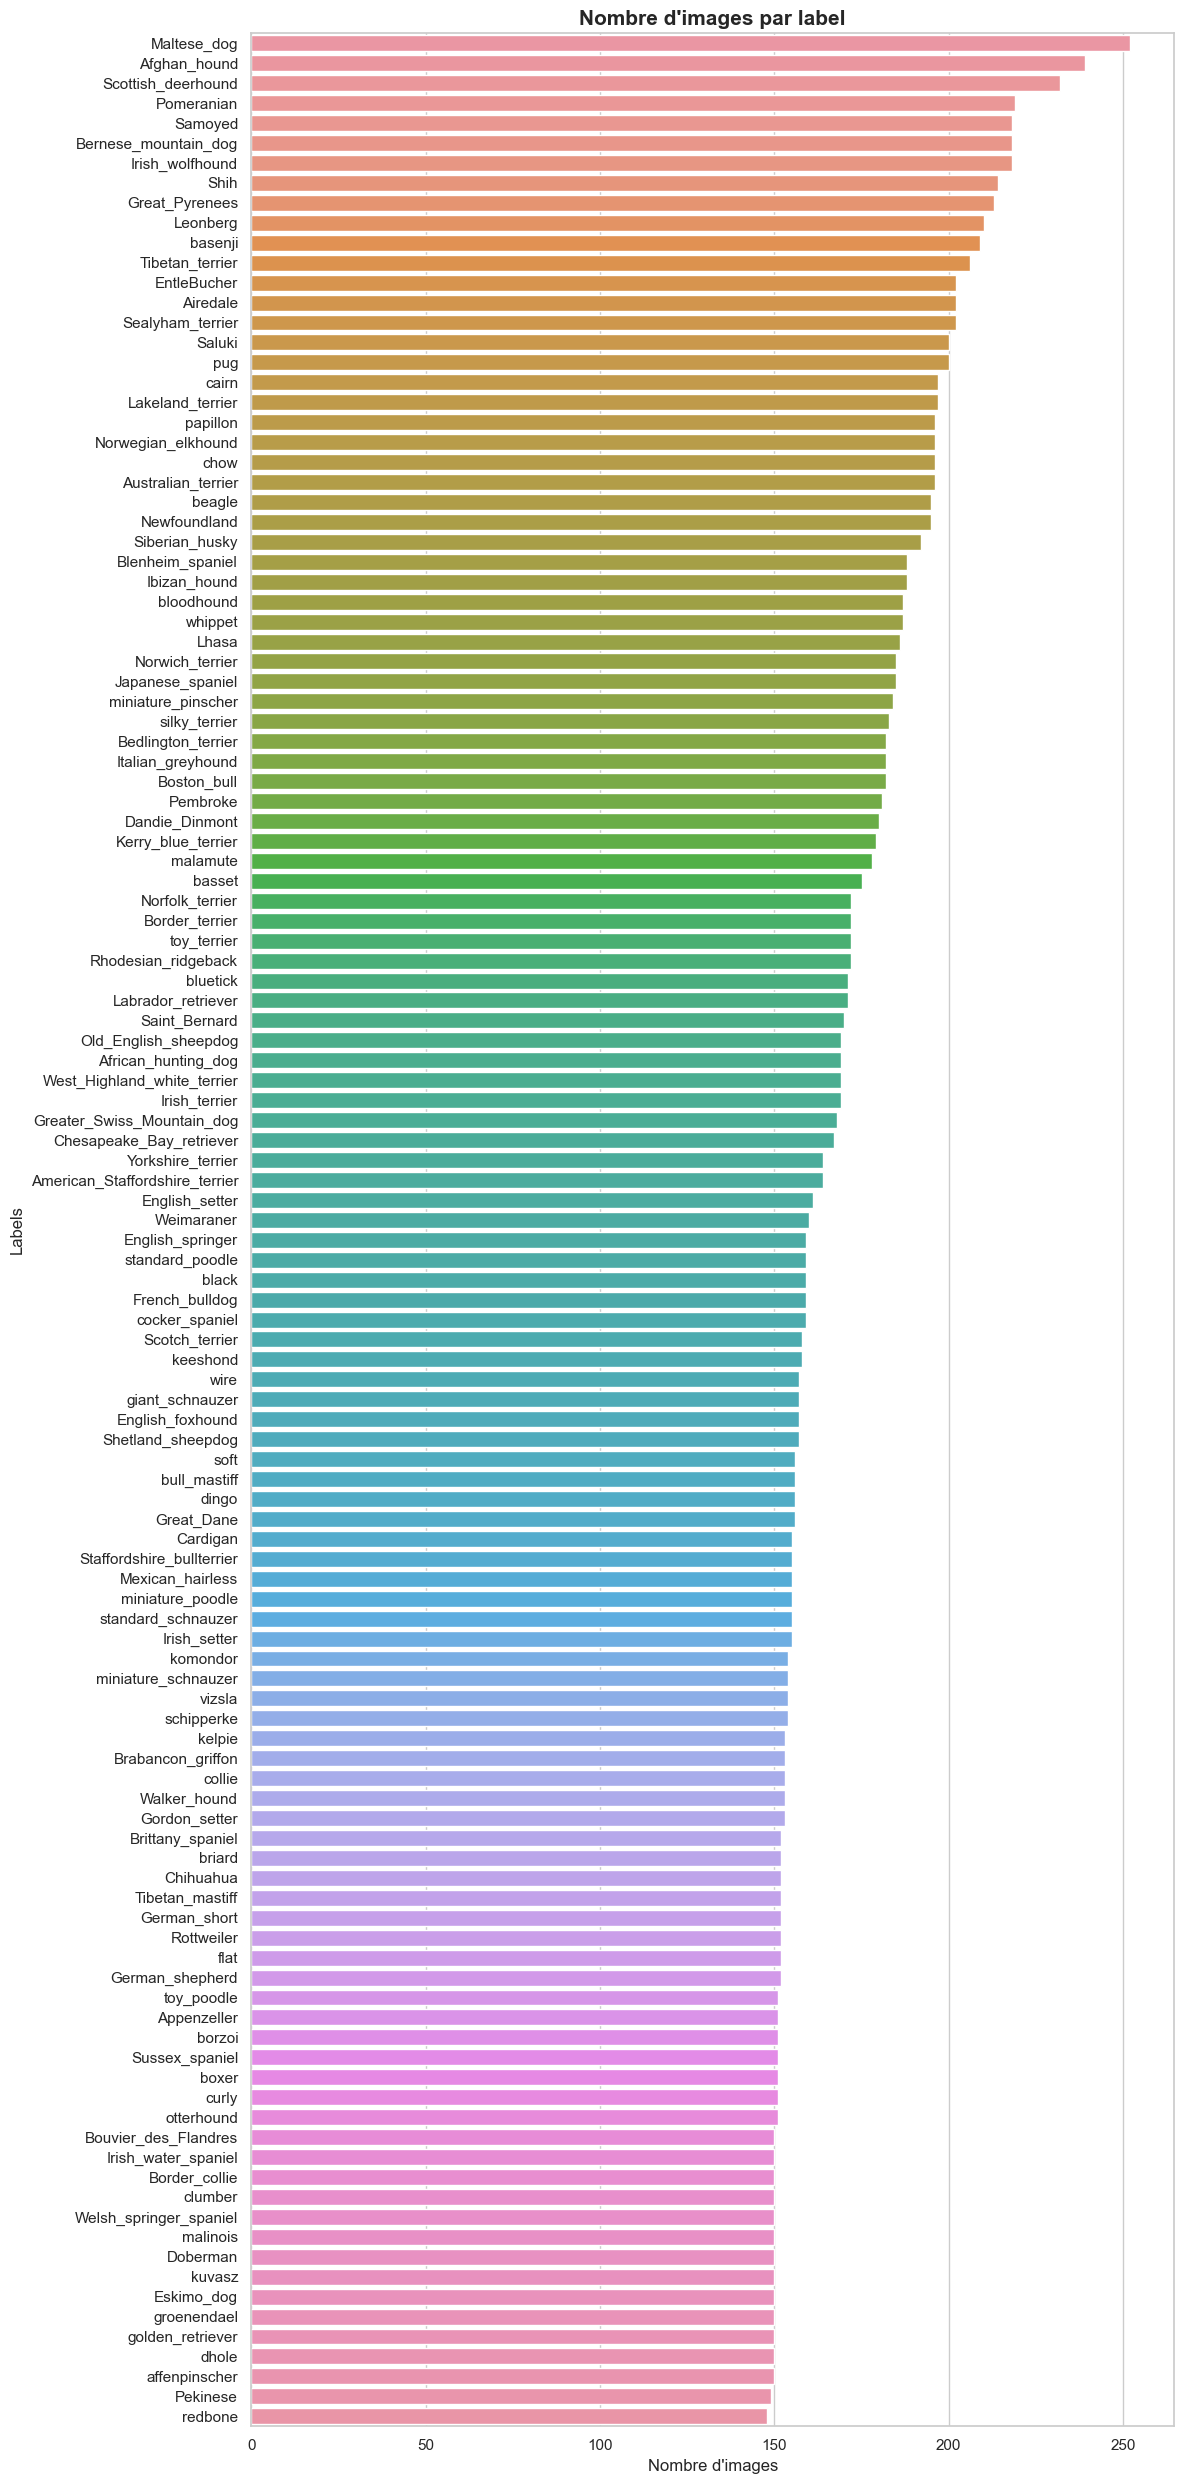

In [4]:
# Grouper et compter le nombre d'images par étiquette
nb = df_dogs.groupby("label").count().sort_values(by="image_path", ascending=False)

# Tracer le graphique
plt.figure(figsize=(12, 25))
sns.set(style="whitegrid")
ax = sns.barplot(x="image_path", y=nb.index, data=nb)
plt.xlabel("Nombre d'images")
plt.ylabel('Labels')
plt.title("Nombre d'images par label", fontdict={'fontweight':'bold', 'fontsize':15})
plt.tight_layout()
plt.show()

### 2.2 Affichage de quelques images <a class="anchor" id="2_2"></a>

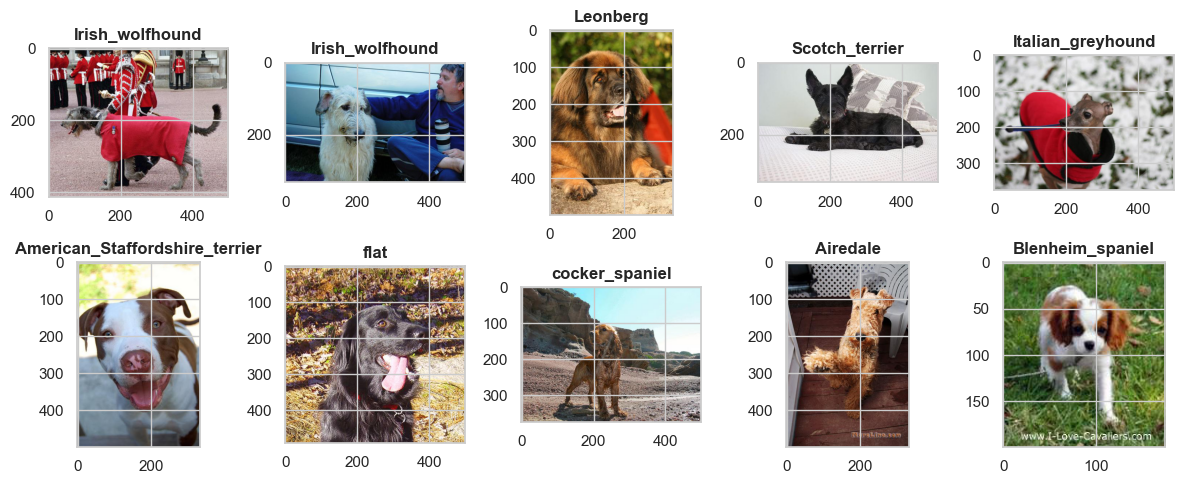

In [5]:
# Sélectionner aléatoirement quelques lignes du DataFrame
sample_df = df_dogs.sample(10)

# Afficher les images et leurs étiquettes
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = mpimg.imread(sample_df.iloc[i]['image_path'])
    plt.imshow(img)
    plt.title(sample_df.iloc[i]['label'], fontdict={'fontweight':'bold'})
    plt.tight_layout()
plt.show()

## 3. Prétraitement des données <a class="anchor" id="3"></a>

### 3.1 Test unitaire <a class="anchor" id="3_1"></a>

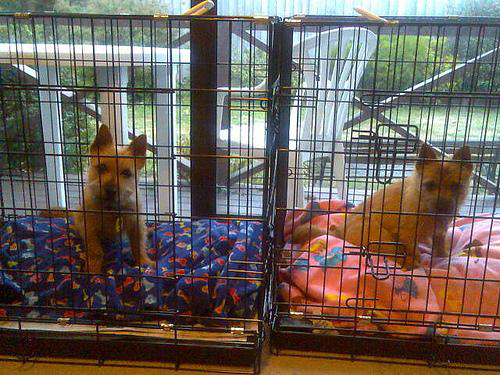

In [6]:
# Choisir une image aléatoirement
sample_race_dir = os.path.join(images_dir, np.random.choice(os.listdir(images_dir), size=1)[0])
sample_img = np.random.choice(os.listdir(sample_race_dir), size=1)[0]

# Charger l'image d'origine
img_path = os.path.join(sample_race_dir, sample_img)
img = load_img(img_path)
img

#### 3.1.1 Redimensionnement de l'image <a class="anchor" id="3_1_1"></a>

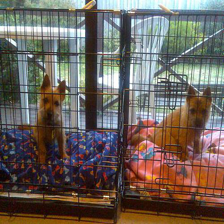

In [7]:
# Resize (224 * 224)
img_resized = img.resize((224, 224))
img_resized

#### 3.1.2 Conversion en niveau de gris <a class="anchor" id="3_1_2"></a>

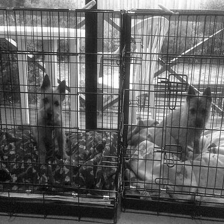

In [8]:
# Convertir en niveau de gris
img_gray = img_resized.convert('L')
img_gray

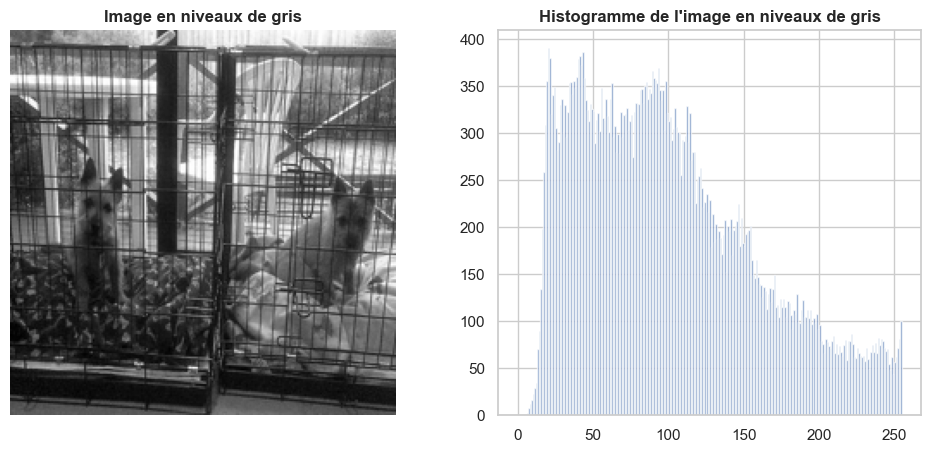

In [9]:
# Affichage de l'histogramme cumulé de l'image
plt.figure(figsize=(12, 5))

# Afficher l'image à gauche
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Image en niveaux de gris', fontdict={'fontweight': 'bold'})
plt.axis('off')

# Afficher l'histogramme à droite
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(img_gray.getdata(), bins=range(256), alpha=0.7)
plt.title("Histogramme de l'image en niveaux de gris", fontdict={'fontweight': 'bold'})

plt.show()

#### 3.1.3 Etirement de l'histogramme avec autocontrast <a class="anchor" id="3_1_3"></a>

In [10]:
# Etirement de l'histogramme
img_autocontrast = ImageOps.autocontrast(img_gray)

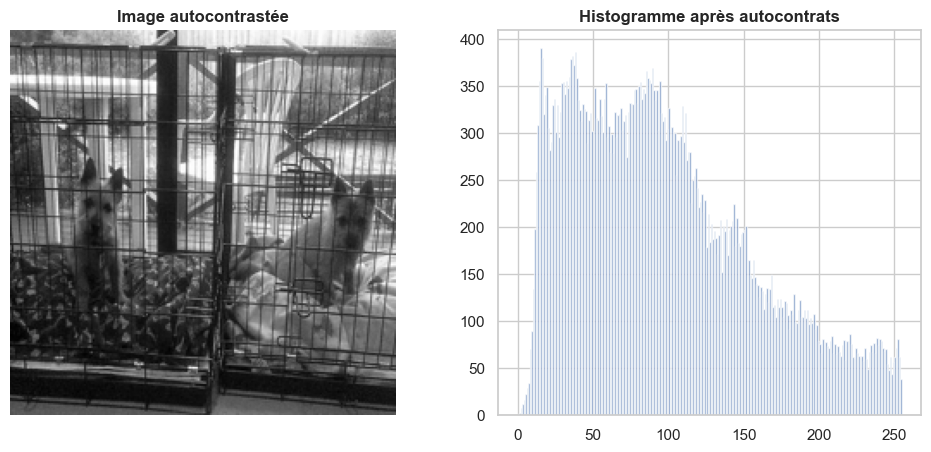

In [11]:
# Affichage de l'histogramme cumulé de l'image
plt.figure(figsize=(12, 5))

# Afficher l'image à gauche
plt.subplot(1, 2, 1)
plt.imshow(img_autocontrast, cmap='gray')
plt.title('Image autocontrastée', fontdict={'fontweight': 'bold'})
plt.axis('off')

# Afficher l'histogramme à droite
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(img_autocontrast.getdata(), bins=range(256), alpha=0.7)
plt.title("Histogramme après autocontrats", fontdict={'fontweight': 'bold'})

plt.show()

#### 3.1.4 Egalisation de l'histogrammme <a class="anchor" id="3_1_4"></a>

In [12]:
# Egaliser l'histogramme
img_equalized = ImageOps.equalize(img_autocontrast)

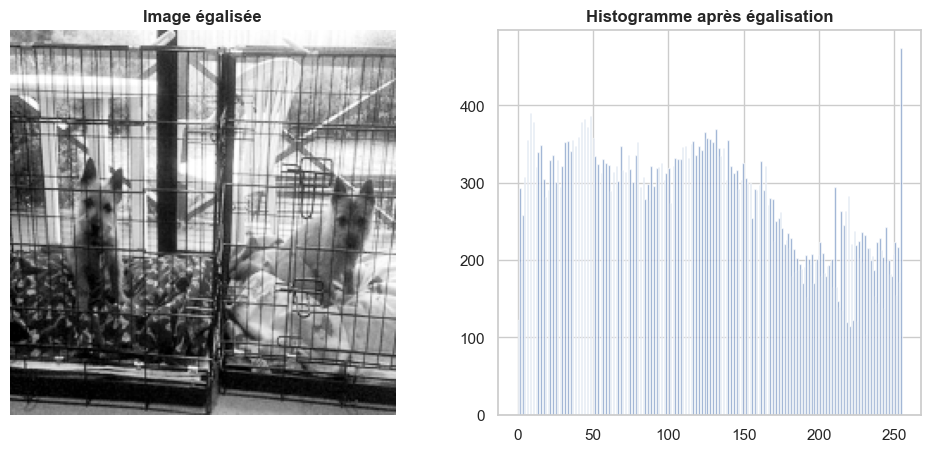

In [13]:
# Affichage de l'histogramme cumulé de l'image
plt.figure(figsize=(12, 5))

# Afficher l'image à gauche
plt.subplot(1, 2, 1)
plt.imshow(img_equalized, cmap='gray')
plt.title('Image égalisée', fontdict={'fontweight': 'bold'})
plt.axis('off')

# Afficher l'histogramme à droite
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(img_equalized.getdata(), bins=range(256), alpha=0.7)
plt.title("Histogramme après égalisation", fontdict={'fontweight': 'bold'})

plt.show()

#### 3.1.5 Filtrage de l'image <a class="anchor" id="3_1_5"></a>

In [14]:
# Appliquer différents filtres
smoothed_img = img_equalized.filter(ImageFilter.SMOOTH)
edges_img = img_equalized.filter(ImageFilter.FIND_EDGES)
sharpened_img = img_equalized.filter(ImageFilter.SHARPEN)
gaussian_img = img_equalized.filter(ImageFilter.GaussianBlur)
emboss_img = img_equalized.filter(ImageFilter.EMBOSS)
unsharp_img = img_equalized.filter(ImageFilter.UnsharpMask)
median_img = img_equalized.filter(ImageFilter.MedianFilter)
maxfilter_img = img_equalized.filter(ImageFilter.MaxFilter)

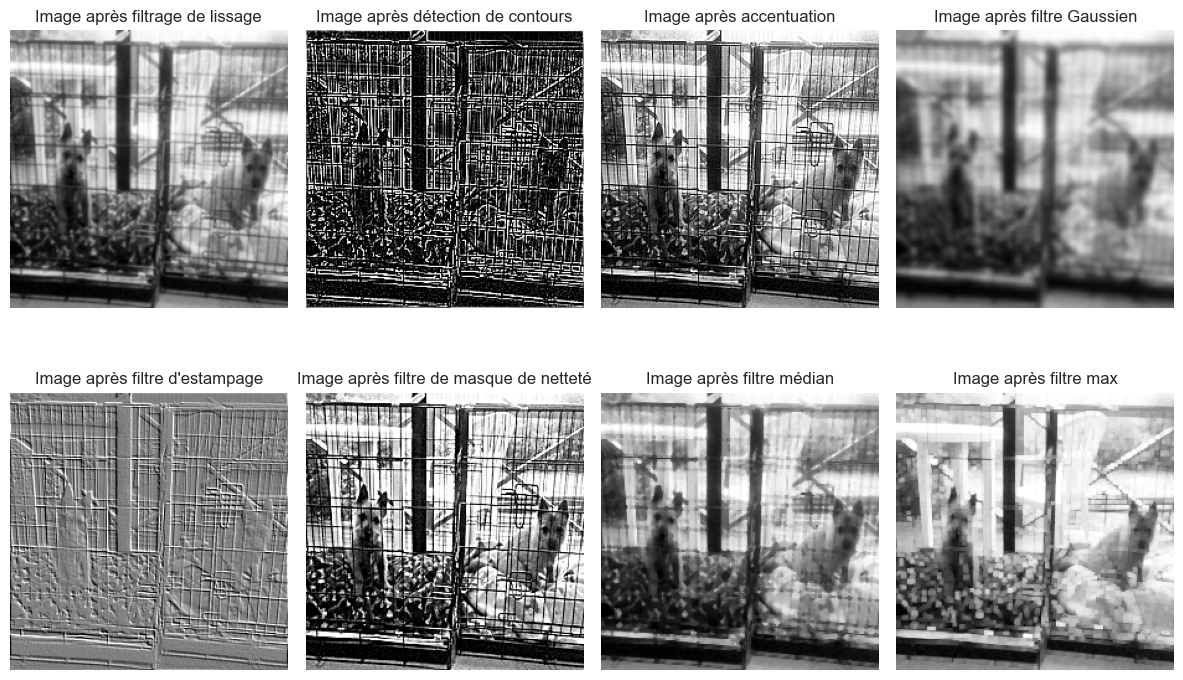

In [15]:
# Afficher les images
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(smoothed_img, cmap='gray')
plt.title('Image après filtrage de lissage')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(edges_img, cmap='gray')
plt.title('Image après détection de contours')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Image après accentuation')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Image après filtre Gaussien')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(emboss_img, cmap='gray')
plt.title("Image après filtre d'estampage")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(unsharp_img, cmap='gray')
plt.title("Image après filtre de masque de netteté")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(median_img, cmap='gray')
plt.title("Image après filtre médian")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(maxfilter_img, cmap='gray')
plt.title("Image après filtre max")
plt.axis('off')

plt.tight_layout()
plt.show()

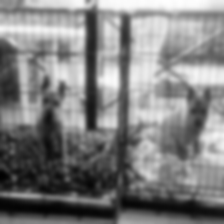

In [16]:
# Choix des filtres
gaussian_img = img_equalized.filter(ImageFilter.GaussianBlur(radius=2))
gaussian_img

### 3.2 Test de la fonction de prétraitement des données <a class="anchor" id="3_2"></a>

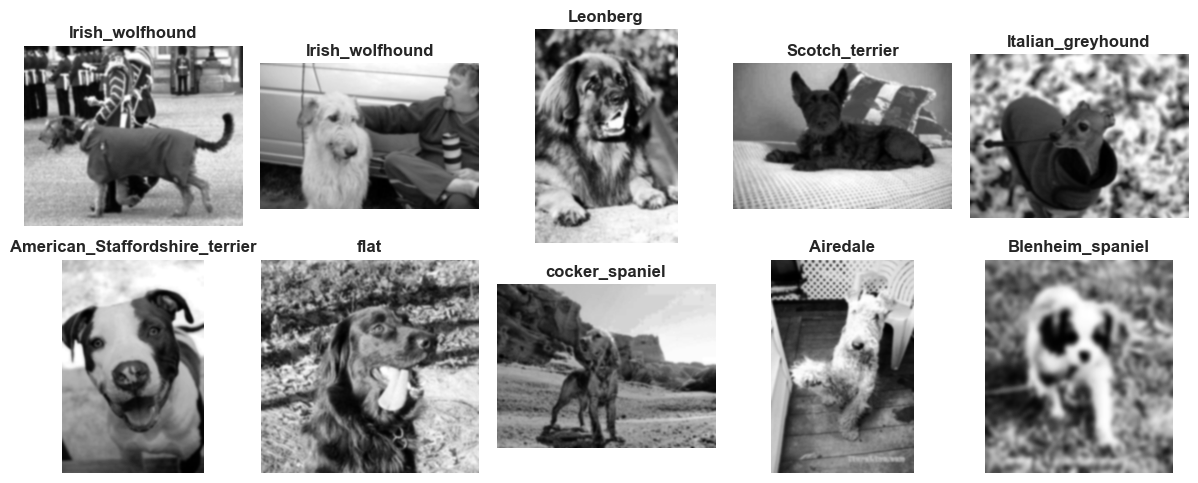

In [17]:
# Afficher les images prétraitées
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img_path = sample_df.iloc[i]['image_path']
    preprocessed_img = preprocess_images(img_path)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title(sample_df.iloc[i]['label'], fontdict={'fontsize': 12, 'fontweight': 'bold'})
    plt.axis('off')
plt.tight_layout()
plt.show()

### 3.3 Prétraitement des données <a class="anchor" id="3_3"></a>

In [18]:
# Définir le répertoire de destination pour les images prétraitées
destination_dir = 'Images_preprocessed/'

# Supprimer le répertoire s'il existe déjà
if os.path.exists(destination_dir):
    shutil.rmtree(destination_dir)

# Créer le répertoire
os.makedirs(destination_dir)

# Prétraitement et enregistrement des images
for i, image_path in enumerate(tqdm(df_dogs["image_path"], desc="Prétraitement et enregistrement des images")):
    preprocessed_img = preprocess_images(image_path)
    
    # Extraire le nom de la race à partir du chemin de l'image
    race_name = os.path.basename(os.path.dirname(image_path).split('-')[1])
    # Nom de fichier sans extension
    filename = os.path.splitext(os.path.basename(image_path))[0]
    
    # Chemin du dossier de destination pour la race
    race_destination_dir = os.path.join(destination_dir, race_name)
    # Créer le dossier s'il n'existe pas déjà
    os.makedirs(race_destination_dir, exist_ok=True)
    # Chemin complet du fichier de destination avec l'extension .jpg
    destination_path = os.path.join(race_destination_dir, f'{filename}_{race_name}.jpg')
    
    # Convertir l'image PIL en tableau numpy
    preprocessed_array = np.array(preprocessed_img)
    
    # Enregistrer l'image prétraitée
    cv2.imwrite(destination_path, preprocessed_array)

Prétraitement et enregistrement des images: 100%|██████████| 20580/20580 [02:21<00:00, 144.94it/s]


## 4. Séparation en train, validation et test set <a class="anchor" id="4"></a>

In [19]:
# Définir le répertoire racine contenant les dossiers par race de chien
root_dir = 'Images_preprocessed'

# Supprimer les dossiers train, test et validation s'ils existent déjà
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
val_dir = os.path.join(root_dir, 'validation')
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
if os.path.exists(val_dir):
    shutil.rmtree(val_dir)

# Liste des noms de dossiers correspondant à chaque race de chien
class_names = os.listdir(root_dir)

# Créer des dossiers pour les données d'entraînement, de validation et de test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
    
# Diviser les images train_set, test_set et validation_set
for class_name in tqdm(class_names, desc="Traitement des données"):
    # Chemin complet vers le dossier de chaque race
    class_dir = os.path.join(root_dir, class_name)
    
    # Liste des noms de fichiers dans le dossier de chaque race
    files = os.listdir(class_dir)
    
    # Diviser les fichiers train, validation et test
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=0)
    train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=0)
    
    # Déplacer les fichiers correspondants dans les dossiers de train, validation et test
    for file in train_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(train_dir, class_name, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.move(src, dst)
        
    for file in val_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(val_dir, class_name, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.move(src, dst)
        
    for file in test_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(test_dir, class_name, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.move(src, dst)
        
# Supprimer tous les dossiers qui ne sont pas train, test ou validation
for folder in os.listdir(root_dir):
    if folder not in ['train', 'test', 'validation']:
        shutil.rmtree(os.path.join(root_dir, folder))

# Afficher un message de confirmation
print("Données déplacées avec succès en ensembles d'entraînement, de validation et de test.")

Traitement des données: 100%|██████████| 120/120 [00:09<00:00, 12.74it/s]

Données déplacées avec succès en ensembles d'entraînement, de validation et de test.
